# Audio Processing for Noise Removal
This notebook documents the processing steps for removing noise from an audio track.  In particular, it was being applied to a specific audio track from YouTube lectures by Paul Dirac.  These lectures had audio with substantial background "hum" which I wished to remove and produce a cleaned-up audio track.  (This first lecture is:  https://www.youtube.com/watch?v=vwYs8tTLZ24 )

As a preprocessing step, used a site called https://peggo.tv/ to convert part of the YouTube to an MP3 extract.  Then I used an MP3 to WAV conversion tool called ffmpeg (https://www.ffmpeg.org/).

## Loading Data

In [1]:
import numpy as np
import scipy.signal as sig
import io
import soundfile as sf
import matplotlib.pyplot as plt
import pickle
import sounddevice as sd

inputFile = './wav/Dirac_1_of_4.wav'
data, samplerate = sf.read(inputFile)
print('Samplerate = ', samplerate)

Samplerate =  44100


## Displaying Data

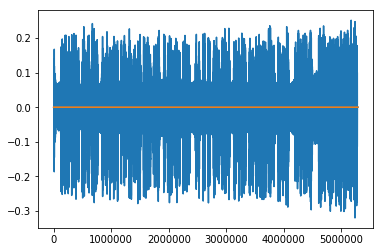

In [2]:
plt.plot(data)

In [3]:
len(data)/samplerate

120.0065306122449

The above snippet represents about 120 seconds (2 minutes) of data at the beginning of the lecture.  The entire lecture is about 1 hour long.

In [4]:
sd.play(data, samplerate)
#sd.stop()

## Analyzing the Data

Zoom into the initial segment of audio.

In [33]:
len_extract = 2*samplerate # seconds of data
data_extract = data[:len_extract,0]

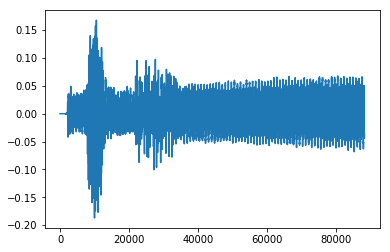

In [34]:
plt.plot(data_extract)

In [39]:
sd.play(data_extract, samplerate)

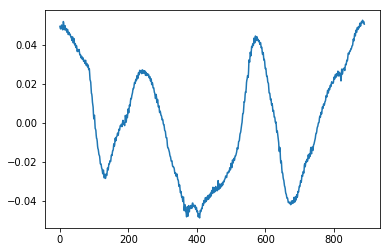

In [71]:
noise_extract=data_extract[40000:40890]
plt.plot(noise_extract)

In [78]:
sd.play(noise_extract, samplerate)

In [68]:
### Use the noise extract as a template, and compute the correlation with the original signal.
sig_noise_corr = np.correlate(data_extract, noise_extract)

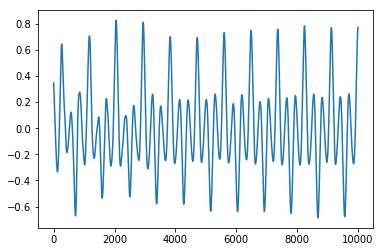

In [69]:
plt.plot(sig_noise_corr[30000:40000])

/opt/anaconda/anaconda3/lib/python3.6/site-packages/numpy/lib/shape_base.py:873: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return c.reshape(shape_out)


100.0

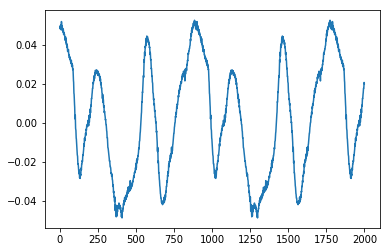

In [76]:
nTile=np.ceil(len(data_extract)/len(noise_extract)) # number of duplicates
noise_tile = np.tile(noise_extract,nTile)
plt.plot(noise_tile[:2000])
nTile

In [79]:
sd.play(noise_tile, samplerate)

In [82]:
print(len(data_extract))
print(len(noise_tile))

88200
89000
